In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/bridget/Downloads/Instacart Basket Analysis 11-2022'

In [4]:
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_custm.pkl'))

In [5]:
df_ords_prods_cust.shape

(32404859, 33)

In [6]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  Unnamed: 0              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  price_range             object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

<AxesSubplot:>

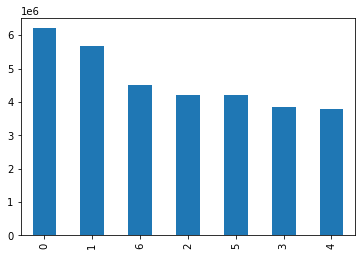

In [7]:
df_ords_prods_cust['order_dow'].value_counts().plot.bar()

Text(0.5, 1.0, 'Day of Week')

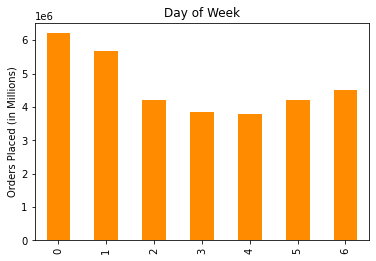

In [37]:
barchart_order_dow = df_ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar(color = ['darkorange'])
plt.xlabel('')
plt.ylabel('Orders Placed (in Millions)')
plt.title ('Day of Week')

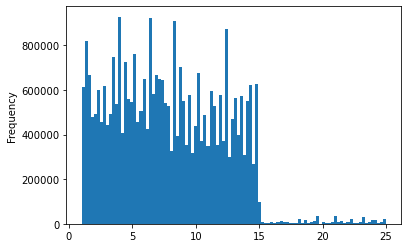

In [38]:
# Histogram for prices
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

In [39]:
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >100, 'prices'] = np.nan

Check the max price 

In [40]:
df_ords_prods_cust['prices'].max()

25.0

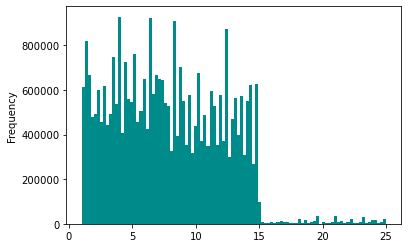

In [41]:
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100, color = 'darkcyan')

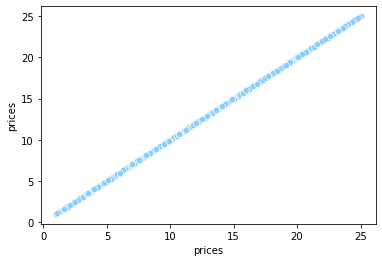

In [53]:
# Create scatterplot
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust, color = 'lightskyblue')

Create subset of date for line chart

Define seed

In [43]:
np.random.seed(7)

In [44]:
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.8

In [45]:
dev

array([ True,  True,  True, ...,  True,  True,  True])

In [46]:
big_sample = df_ords_prods_cust[dev]

In [47]:
small_sample = df_ords_prods_cust[~dev]

In [48]:
len(dev)

32404859

In [49]:
len(big_sample) + len(small_sample)

32404859

In [50]:
# Create subset dataframe for line chart
df_small = small_sample[['order_dow','prices']]

In [51]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480314 entries, 4 to 32404837
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   order_dow  int64  
 1   prices     float64
dtypes: float64(1), int64(1)
memory usage: 148.3 MB


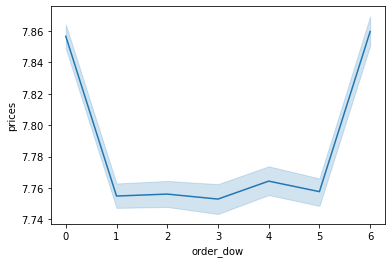

In [52]:
# Creating a line chart
line_chart_dow_prices = sns.lineplot(data = df_small, x = 'order_dow',y = 'prices')

Create histogram and describe what it demonstrates 

Text(0.5, 1.0, 'Time of Order')

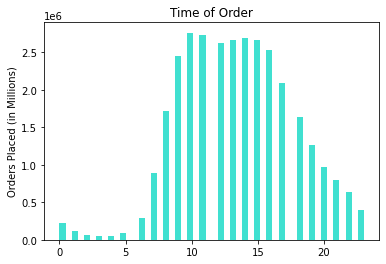

In [54]:
hist_order_hour_of_day = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 50, color = 'turquoise')
plt.xlabel('')
plt.ylabel('Orders Placed (in Millions)')
plt.title ('Time of Order')

Create bar chart from 'loyalty_flag' column

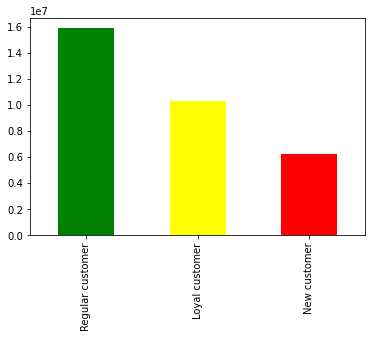

In [55]:
barchart_customer_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['green', 'yellow', 'red'])

In [56]:
# Create a line chart
df_order_hour_of_day_prices = small_sample[['order_hour_of_day','prices']]

In [57]:
df_order_hour_of_day_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480314 entries, 4 to 32404837
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 406.3 MB


In [58]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
4,15,9.0
11,8,4.4
15,15,4.4
18,14,4.4
21,8,4.7


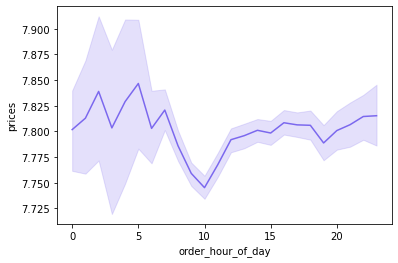

In [60]:
# Create a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices', color = 'mediumslateblue')

Now that you have information about customers, you need to conduct some exploratory 

analysis of customer demographics to inform the targeted marketing campaigns. First,

determine whether there’s a connection between age and family situation by creating a line 

chart exploring the connections between age and number of dependents:
    
In a markdown cell beneath your line chart, describe what the line chart shows.

In [70]:
#Create subset for the line chart 
df_age_dependents = small_sample[['Age','n_dependants']]

In [71]:
df_age_dependents.head()

,Age,n_dependants
4,31,3
11,31,3
15,31,3
18,31,3
21,31,3


In [72]:
df_age_dependents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480314 entries, 4 to 32404837
Data columns (total 2 columns):
 #   Column        Dtype
---  ------        -----
 0   Age           int64
 1   n_dependants  int64
dtypes: int64(2)
memory usage: 406.3 MB


In [73]:
df_age_dependents.describe()

,Age,n_dependants
count,6.480314e+06,6.480314e+06
mean,4.947417e+01,1.501314e+00
std,1.848606e+01,1.119020e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,0.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


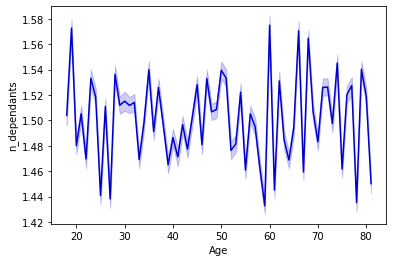

In [87]:
# Create line chart 
line_chart_age_dependents = sns.lineplot(data = df_age_dependents, x = 'Age',y = 'n_dependants', color = 'mediumblue')

You’ll also need to explore whether there’s a connection between age and spending power 

(income). To visualize this relationship, create a scatterplot using the sns.scatterplot() 

function.

In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [75]:
# Define dataframe subset for scatterplot
df_age_income = small_sample[['Age','income']]

In [76]:
df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480314 entries, 4 to 32404837
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   Age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 406.3 MB


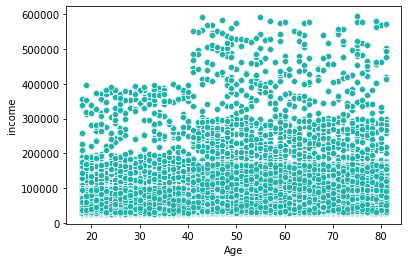

In [77]:
# Create scatterplot
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_age_income, color = 'lightseagreen')

Scatter plot shows higher aged groups have higher income and spend more than those <40 


In [78]:
barchart_order_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_order_dow.png'))

In [79]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices04.01.png'))

In [80]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices04.01.png'))

In [81]:
line_chart_dow_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_dow_prices04.01.png'))

In [82]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day04.01.png'))

In [83]:
barchart_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_customer_loyalty04.01.png'))

In [84]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices04.01.png'))

In [88]:
line_chart_age_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependents04.01.png'))

In [86]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income04.01.png'))